In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime
warnings.filterwarnings('ignore')
%matplotlib inline

In [11]:
df=pd.read_csv('GOLD.csv')

In [12]:
df.set_index('Date',inplace=True)

In [13]:
df.head()

,Price,Open,High,Low,Vol.,Change %,Pred,new
Date,,,,,,,,
"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318


In [14]:
df_droped=df.dropna()
df_to_fill= df.iloc[411:,:]

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
#Linear regression

X= df_droped[['Open','High','Low']].values
pred= df_droped.Pred.values
new=df_droped.new.values

In [17]:
reg= LinearRegression().fit(X,pred)
print('pred\'s score=', reg.score(X,pred))
print('pred\'s coeff=', reg.coef_, 'bias=', reg.intercept_)

pred's score= 0.7962059289157778
pred's coeff= [ 1.87728492  0.55565405 -2.43980328] bias= 203.528385759998


In [18]:
reg2=LinearRegression().fit(X,new)
print('new\'s score=', reg2.score(X,new))
print('new\'s coeff=', reg2.coef_, 'bias=', reg.intercept_)

new's score= 0.9052828458304785
new's coeff= [-1.56905117  1.7921037  -0.22656291] bias= 203.528385759998


In [19]:
pred_to_fill= reg.predict(df_to_fill[['Open','High','Low']])
new_predicted_pred= np.hstack((df_droped['Pred'].values,pred_to_fill))
df.Pred=new_predicted_pred

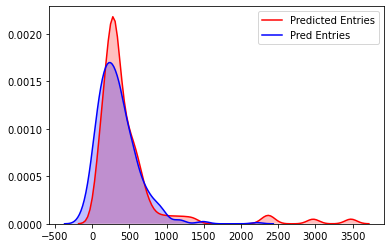

In [20]:
ax=sns.kdeplot(pred_to_fill,label='Predicted Entries',shade=True,color='r')
ax=sns.kdeplot(df_droped['Pred'],label='Pred Entries',shade=True,color='b')

In [21]:
#Polynomial regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

model=Pipeline([('poly', PolynomialFeatures(degree=2)), ('linear', LinearRegression())])

model=model.fit(X,pred)
print(model.score(X,pred))
print(model.named_steps['linear'].coef_)

model = model.fit(X, new)
print('new\'s score =', model.score(X, new))
print('new\'s coeff. = ', model.named_steps['linear'].coef_)

0.8159060375045242
[ 0.00000000e+00  8.31012462e-01  4.41739689e+00 -4.79572276e+00
  7.22421621e-04 -2.88457330e-03  1.50145869e-03  1.87985683e-03
 -1.03173471e-03 -1.94673740e-04]
new's score = 0.9147522370857782
new's coeff. =  [ 0.00000000e+00 -2.09388978e+00  3.74002532e+00 -1.41689019e+00
  3.62468554e-04 -1.47862677e-03  7.85041523e-04  9.75820068e-04
 -5.52469295e-04 -9.59030628e-05]


In [13]:
print(f"""Since the new column is giving the Score for Simple Linear Regression\
higher than the pred's column Score hence i think  new is linear function of\
OHL columns. Also the pred is polynomial function of OHL columns because it gives\
more +ve change in Score than the linear one while comparing to the new column""")

Since the new column is giving the Score for Simple Linear Regressionhigher than the pred's column Score hence i think  new is linear function ofOHL columns. Also the pred is polynomial function of OHL columns because it givesmore +ve change in Score than the linear one while comparing to the new column


In [2]:
import statsmodels.api as sm

In [3]:
data1=pd.read_csv('Mid_Cap\PNB.csv') 
data2=pd.read_csv('Nifty50.csv')

In [8]:
## DAILY VALUE RETURN 

Y=data1['Close Price'].pct_change().dropna(axis=0)
X=data2['Close'].pct_change().dropna(axis=0)

X1 = sm.add_constant(X)

model = sm.OLS(Y, X1)

results = model.fit()

print(results.summary())
print('The daily slope or BETA value is',results.params.Close)


                            OLS Regression Results                            
Dep. Variable:            Close Price   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.139
Method:                 Least Squares   F-statistic:                     80.14
Date:                Sun, 12 Jul 2020   Prob (F-statistic):           7.22e-18
Time:                        19:53:52   Log-Likelihood:                 1000.1
No. Observations:                 493   AIC:                            -1996.
Df Residuals:                     491   BIC:                            -1988.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0016      0.001     -1.111      0.2

In [9]:
print('The beta value is 1.785842 i.e more than 1 that means the PNB stock is more volatile than nifty')

The beta value is 1.785842 i.e more than 1 that means the PNB stock is more volatile than nifty


In [18]:
#Montly
data1['Date']=data1['Date'].astype(dtype='datetime64')
data2['Date']=data2['Date'].astype(dtype='datetime64')

In [19]:
data1.set_index('Date',inplace=True)
data2.set_index('Date',inplace=True)

In [20]:
montly_return_df=pd.concat([data2['Close'].resample("M").mean(),data1['Close Price'].resample("M").mean()], axis=1)
montly_return_df.columns=['Nifty','PNB']
montly_return_df=montly_return_df.pct_change()
montly_return_df.dropna(inplace=True)

X=montly_return_df['Nifty']
y=montly_return_df['PNB']

X1=sm.add_constant(X)

model1=sm.OLS(y,X1)
result1=model1.fit()
print(result1.summary())
print('The monthly slope or BETA value is',result1.params.Nifty)

                            OLS Regression Results                            
Dep. Variable:                    PNB   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.383
Method:                 Least Squares   F-statistic:                     15.25
Date:                Sun, 12 Jul 2020   Prob (F-statistic):           0.000759
Time:                        13:30:15   Log-Likelihood:                 23.293
No. Observations:                  24   AIC:                            -42.59
Df Residuals:                      22   BIC:                            -40.23
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0406      0.020     -1.989      0.0

In [21]:
print("The beta value is 2.8256,i.e more than 1 that means the stock is more volatile than nifty")

The beta value is 2.8256,i.e more than 1 that means the stock is more volatile than nifty
